## 21  트리의 구현과 순회

## 21-1  트리 순회 순서 변경

본 문제는 전위탐색 결과와 중위탐색 결과가 주어질 때 후위탐색 결과를 구하는 문제이다.
1. 첫 번째 입력값으로는 전위 순회한 순서를 보여준다.
2. 두 번째 입력값으로는 중위 순회한 순서를 보여준다.
3. 이를 바탕으로 후위 순회한 순서를 도출해야 한다.

> 예를 들어 다음과 같은 트리 형태의 구조에서
전위 순회는 27 16 9 12 54 36 72
중위 순회는 9 12 16 27 36 54 72 이다. 
따라서 후위 순회(결과값)은 **12 9 16 36 72 54 27**이 된다. 
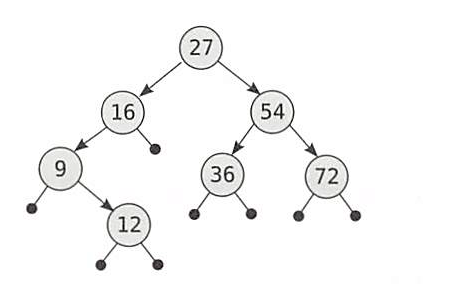

In [37]:
def slice(v,a,b,):
    return v[a:b]
def printPostOrder(preorder, inorder):
    N = len(preorder) # 트리에 포함된 노드의 수
    if len(preorder) == 0 :
        return # 텅빈 트리면 곧장 종료
    root = preorder[0]
    L = inorder.index(root) # 루트의 왼쪽 서브트리의 크기
    R = N-1-L # 루트의 오른쪽 서브트리의 크기
    printPostOrder(slice(preorder,1,L+1), slice(inorder, 0, L)) 
    # 왼쪽 서브트리 재귀적으로 후위탐색
    printPostOrder(slice(preorder,L+1,N), slice(inorder, L+1,N))
    # 오른쪽 서브트리 재귀적으로 후위탐색
    print(root, end = " ")
    # 뿌리를 마지막으로 추가 

In [38]:
a = [27, 16, 9, 12, 54, 36, 72]
b =  [9, 12, 16, 27, 36, 54, 72]
printPostOrder(a,b)

12 9 16 36 72 54 27 

## 22 이진 트리 검색 

## 22 - 1 너드인가, 너드가 아닌가?

In [22]:
def isDominated(x,y,coords):
    """
    한 점이 다른 점에 지배당하는지 확인하는 함수
    """
    x1 = coords[::2] # 좌표에서 coords의 x 값들
    x2 = coords[1::2]# 좌표에서 coords의 y 값들
    temp = [i for i in x1 if i>x]
    a = min(temp, key= lambda y : y-x)
    it = x2[x1.index(a)] 
    if it == x2[-1]: 
        return False
    # 이 점이 x보다 오른쪽에 있는 점 중 가장 위에 있는 점이므로,
    # (x,y)가 어느 점에 지배되러면 이 점에도 지배되어야 한다.
    return y < it

In [25]:
def removeDominated(x,y):
    x1 = coords[::2] # 좌표에서 coords의 x 값들
    x2 = coords[1::2]# 좌표에서 coords의 y 값들
    temp = [i for i in x1 if i>x]
    a = min(temp, key= lambda y : y-x)
    it = x2[x1.index(a)]
    if it == x2[0]:
        return 


In [19]:
a = [1,2,3,4,5,6]
b= [2,3,4,5]
b[a.index(2)]

3

## 22-2 균형 잡힌 이진 트리 직접 - 트립

이진 검색 트리는 다음과 같은 성질은 만족하는 트리 형태의 자료구조이다.

- 왼쪽 자식 노드들의 원소들의 값이 해당 노드보다 더 작다.
- 오른쪽 자식 노드들의 원소들의 값이 해당 노드보다 더 크다.

이러한 이진 검색 트리는 입력이 특정 순서로 주어질 때 그 성능이 떨어진다는 단점을 가진다.

이러한 단점을 해결하기 위해 *트립* 이 사용된다. 트림은 이진 검색 트리 조건과 힙의 조건을 만족한다.

> 힙의 조건이란 ? 모든 노드의 우선순위는 각자의 자식 노드보다 크거나 같은것.

이와 같은 트립은 주어진 input에 **임의적으로 우선순위를 부여**하여 좀 더 안정된(= 퍼진) 트리의 형태를 확률적으로 구현하게 해준다.

> 확률적으로 구현한다는 개념은 : 노드의 순서를 임의적으로 바꿨을 때 트리 높이의 기대치가 O(N)보다 작은 것으로, 좀 더 안정적인 트리형태를 구현하는 것이다. 

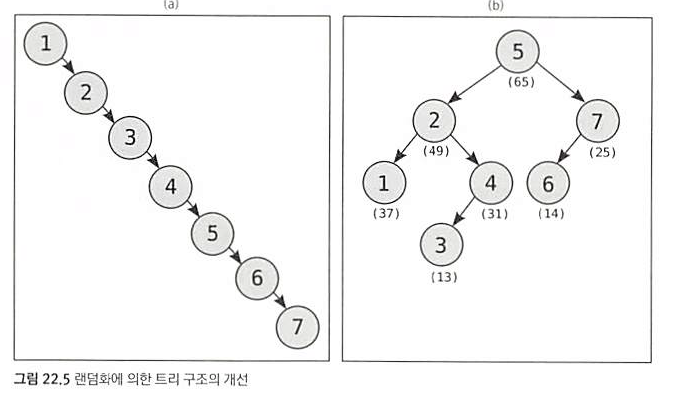

## 22-3 삽입 정렬 뒤집기 

본 문제는 삽입 정렬에서 각 위취에 있는 값들이 움직인 칸수를 표현한 데이터를 기반으로 원래 수열을 찾아내는 문제이다.

> 삽입 정렬이란? A[0..,i-1]이 정렬된 배열일 때, A[i]를 적절한 위치 까지 만날 때까지 왼쪽으로 한 칸씩 움직이면서 정렬을 함. 이러한 과정을 i=1 부터 끝까지 수행하여 전체 수열을 정렬하는 방식이다.

아래의 그림과 같이 A = [5,1,4,3,2]의 배열이 주어졌을 때 각 위치의 원소들이 움직인 칸수는 [0,1,1,2,3]이 된다. 
입력값으로 [0,1,1,2,3]이 주어졌을 때, [5,1,4,3,2] 배열을 결과값으로 도출해야 한다.

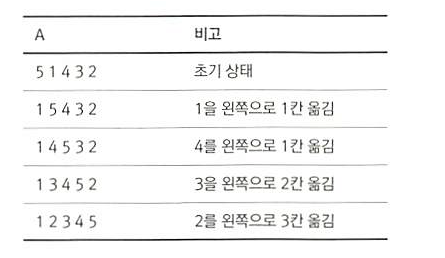

In [3]:
def shift(counts):
    """
    1..N까지의 자연수로 이루어진 정렬을 삽입정렬 하였을 때, 각각의 위치의 원소의
    옮긴 횟수로 원래의 배열을 구하는 함수
    """
    N = len(counts)
    answer = [] # 빈 배열을 만듦
    array = list(range(1,N+1)) # 1 부터 N까지의 배열을 생성
    for i in range(N-1,-1,-1): 
        # 옮긴 횟수 끝 값을 통해 끝에서 부터 원소를 채워 넣음
        temp = len(array)-counts[i] # 자기보다 큰 원소의 개수   
        # 예를 들어 N = 5에서 counts[4]값이 3이면 A[4]의 값은 총 1,2,3,4,5 중에서 
        # A[4]보다 큰 원소가 3개이므로 2.
        answer.append(array[temp-1]) # A[i]값을 채워 넣음
        array.pop(temp-1) # [1,2,,,N]에서 해당 원소를 지움
        if len(array) ==1:
            answer.append(array[0])
            break
    return answer[::-1]

In [4]:
# Test Data
print(shift([0,1,1,2,3]))
print(shift([0,1,2,3]))

[5, 1, 4, 3, 2]
[4, 3, 2, 1]
